### Which MOEA is the Best ?

Algorithms to be considered
* PAES(1+1)
* PAES(1+|A|)
* SPEA 2
* NSGA 2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [24]:
model_list = []
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
problem = DTLZ2(n_obj=2)
algorithm = SPEA2(pop_size=1000)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 4),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |      igd+     |      gd+     
     1 |     1000 |     21 |  0.2553826449 |  0.4167162640 |  0.0298997870 |  0.2501945841 |  0.4167162629
     2 |     2000 |     21 |  0.2084496407 |  0.3921714517 |  0.0419878932 |  0.2067178296 |  0.3921714506
     3 |     3000 |     23 |  0.1493522873 |  0.2679981175 |  0.0721297437 |  0.1373112127 |  0.2679979383
     4 |     4000 |     27 |  0.1183466943 |  0.2486509771 |  0.0880531409 |  0.1144693870 |  0.2486502345
n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |      igd+     |      gd+     
     1 |     1000 |     17 |  0.2432514650 |  0.3859681103 |  0.0238110585 |  0.2408632497 |  0.3859681103
     2 |     2000 |     26 |  0.1826342354 |  0.2968381813 |  0.0466920877 |  0.1785612813 |  0.2968381813
     3 |     3000 |     31 |  0.1383944650 |  0.2636156356 |  0.0733817899 |  0.1370565163 |  0.2636150619
     4 |     4000 |     38 |  0.11930

In [25]:
data_hv_per_gen = []
for i in model_list:
    data = []
    for j in range(4):
        data.append(i.history[j].output.hv.value)
    data_hv_per_gen.append(data)
    

In [26]:
data_hv_per_gen

[[0.029899787006212097,
  0.041987893229116516,
  0.07212974374960487,
  0.08805314090639976],
 [0.023811058487330942,
  0.046692087665613,
  0.07338178986759754,
  0.1040105598268996]]

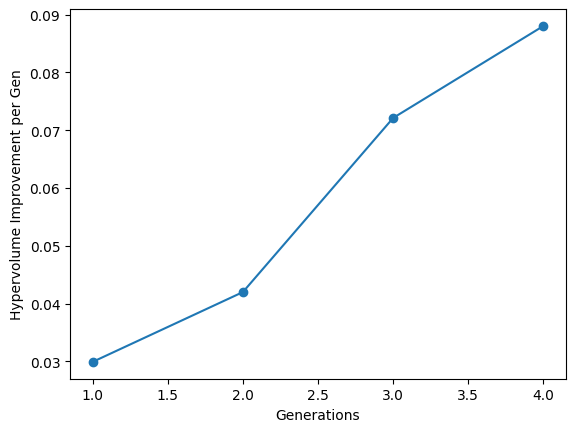

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter([1,2,3,4],data_hv_per_gen[0])
plt.plot([1,2,3,4],data_hv_per_gen[0])
plt.ylabel('Hypervolume Improvement per Gen')
plt.xlabel('Generations')
plt.show()

In [ ]:
from pymoo.algorithms.moo.spea2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2)
algorithm = NSGA2(pop_size=1000)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True))

In [ ]:
from pymoo.algorithms.moo.spea2 import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2)
ref_dirs = get_reference_directions('energy',3,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True))

In [ ]:
from pymoo.algorithms.moo.rnsga2 import RNSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_rnsga2 = []
problem = DTLZ2(n_obj=2)
algorithm = RNSGA2(pop_size = 1000,extreme_points_as_reference_points=True)
for i in range(5):
    model_list_rnsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True))

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2)
ref_dirs = get_reference_directions('energy',3,90,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True))